In [8]:
%load_ext autoreload
%autoreload 2

In [16]:
from zs6d import ZS6D
import os
import json


# Loading the config file:
with open(os.path.join("./zs6d_configs/bop_eval_configs/cfg_ycbv_inference_bop.json"), "r") as f:
    config = json.load(f)
    
# Instantiating the pose estimator:
# This involves handing over the path to the templates_gt file and the corresponding object norm_factors.
pose_estimator = ZS6D(config['templates_gt_path'], config['norm_factor_path'])

Using cache found in /home/cuong.vandam/.cache/torch/hub/facebookresearch_dino_main
100%|██████████| 21/21 [00:06<00:00,  3.14it/s]


all_corr: 0.3547544479370117, desc: 0.15989303588867188, chunk cosine: 0.06108498573303223, saliency: 0.009497404098510742, kmeans: 0.062896728515625, bb: 0.1242532730102539


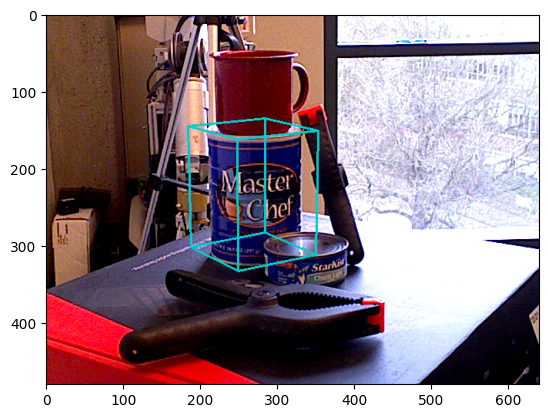

Pose estimation time: 0.4475831985473633
R_est: [[-0.81789375  0.5753227   0.00732211]
 [ 0.13531557  0.20470598 -0.96942517]
 [-0.55923118 -0.79189599 -0.24527786]]
t_est: [-38.46364982 -10.51853366 914.82230583]
all_corr: 0.35089755058288574, desc: 0.1608893871307373, chunk cosine: 0.05947685241699219, saliency: 0.00959920883178711, kmeans: 0.0594480037689209, bb: 0.12090754508972168


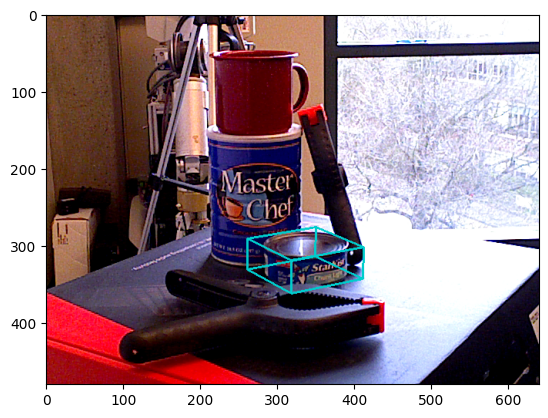

Pose estimation time: 0.4435415267944336
R_est: [[-0.84844082  0.52925327  0.00625666]
 [ 0.11913354  0.20247268 -0.97201441]
 [-0.51570861 -0.82395133 -0.23483791]]
t_est: [ 17.74398205  59.64137156 841.48564163]
all_corr: 0.33614611625671387, desc: 0.15845346450805664, chunk cosine: 0.05954933166503906, saliency: 0.008508682250976562, kmeans: 0.050141334533691406, bb: 0.10961008071899414


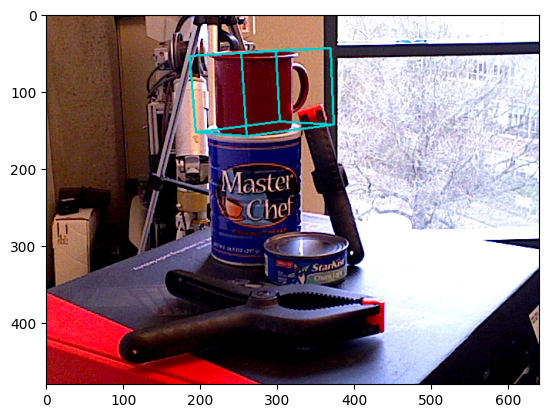

Pose estimation time: 0.43701958656311035
R_est: [[ 0.77418951 -0.6307462  -0.05281886]
 [-0.15498839 -0.10800308 -0.98199487]
 [ 0.61368493  0.76843644 -0.18137319]]
t_est: [ -26.47344063 -117.32553674  881.17061949]
all_corr: 0.2454671859741211, desc: 0.1581401824951172, chunk cosine: 0.05947589874267578, saliency: 0.009111642837524414, kmeans: 0.0024251937866210938, bb: 0.018715858459472656


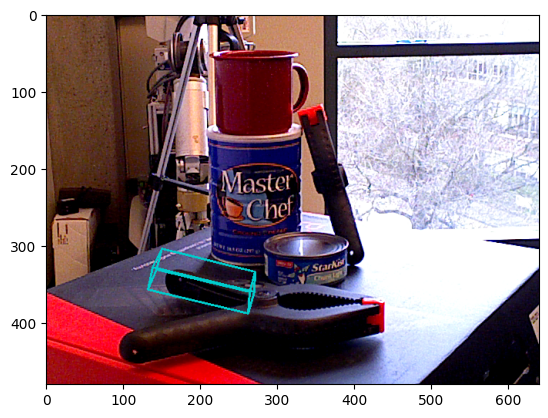

Pose estimation time: 0.3349020481109619
R_est: [[-0.02904363 -0.96670442  0.25424208]
 [-0.1895635  -0.24440691 -0.95096317]
 [ 0.98143881 -0.07581444 -0.17615341]]
t_est: [-143.79700693  137.85581671 1416.69975832]
all_corr: 0.24996018409729004, desc: 0.16203665733337402, chunk cosine: 0.05951428413391113, saliency: 0.008687496185302734, kmeans: 0.003154277801513672, bb: 0.019696950912475586


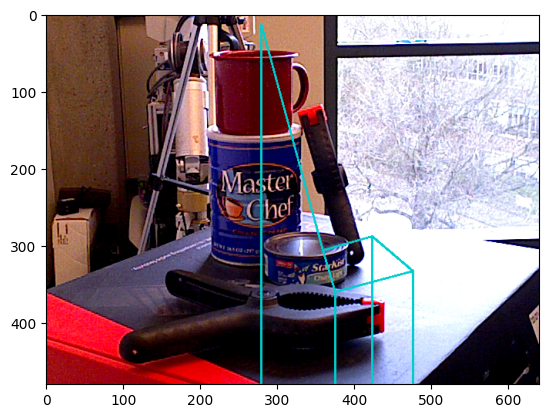

Pose estimation time: 0.34931135177612305
R_est: [[-0.01577363  0.26103354  0.96520085]
 [ 0.02962886  0.96501906 -0.26050017]
 [-0.9994365   0.02448877 -0.02295598]]
t_est: [ 19.48952402 -45.59545189 473.18891257]


In [19]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt

# Loading a ground truth file to access segmentation masks to test zs6d:
with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)

img_id = '000048_1'
# img_id = '8'



for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = os.path.join(config['dataset_path'], data_gt[img_id][obj_number]['img_name'].split("./")[-1])
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est = pose_estimator.get_pose(img, str(obj_id), mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    plt.imshow(out_img)
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")


